In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
print("Before cleaning:")
print(df.shape)
print(df.isna().sum())
print(df.describe(include='all'))

Before cleaning:
(51717, 17)
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64
                                                      url        address  \
count                                               51717          51717   
unique                                              51717          11495   
top     https://www.zomato.com/bangalore/jalsa-banasha...  Delivery Only   
freq                     

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import MinMaxScaler,robust_scale,PowerTransformer
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [28]:
# Drop irrelevant columns
drop_cols = ['url', 'address', 'phone', 'menu_item']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

In [29]:
#columns to snake_case
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [30]:
# Clean 'approx_cost(for_two_people)' column
if 'approx_cost(for_two_people)' in df.columns:
    df['approx_cost(for_two_people)'] = (
        df['approx_cost(for_two_people)']
        .astype(str).str.replace(',', '')
        .astype(float)
    )

In [31]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [32]:
# Drop rows with essential missing values
df.dropna(subset=['rate', 'approx_cost(for_two_people)'], inplace=True)
print("Shape after basic cleaning:", df.shape)

Shape after basic cleaning: (23247, 13)


In [33]:
# Example: IQR method for cost column
Q1 = df['approx_cost(for_two_people)'].quantile(0.25)
Q3 = df['approx_cost(for_two_people)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [34]:
# Capping outliers instead of removing
df['approx_cost(for_two_people)'] = np.where(
    df['approx_cost(for_two_people)'] > upper_bound,
    upper_bound,
    np.where(
        df['approx_cost(for_two_people)'] < lower_bound,
        lower_bound,
        df['approx_cost(for_two_people)']
    )
)


In [35]:
# checking for null values
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for_two_people)    0
reviews_list                   0
type                           0
city                           0
dtype: int64

In [36]:
# checking shape
df.shape

(23247, 13)

In [37]:
# checking for duplicated rows
df.duplicated().sum()

0

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


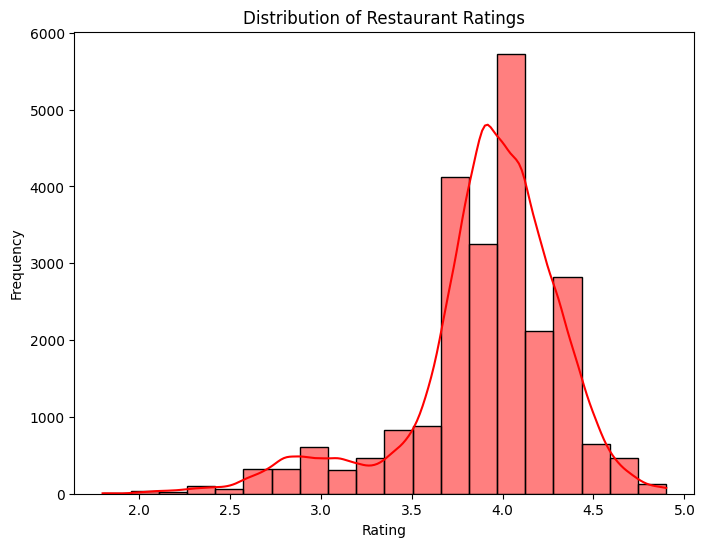

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rate'], bins=20, kde=True , color='red')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Remove extra spaces
df['name'] = df['name'].str.strip()

In [41]:
# Convert cuisines string to list
df['cuisines'] = df['cuisines'].astype(str).str.split(',')

In [45]:
import re
# Remove emojis and special characters from name 
def clean_text(text):
    if pd.isnull(text):
        return text
    return re.sub(r'[^\w\s,.-]', '', text)

df['name'] = df['name'].apply(clean_text)


In [46]:
# If currency column exists
if 'currency' in df.columns:
    df = df[df['currency'] == 'Indian Rupees(Rs.)']


In [49]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for_two_people),reviews_list,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","[North Indian, Mughlai, Chinese]",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","[Chinese, North Indian, Thai]",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","[Cafe, Mexican, Italian]",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"[South Indian, North Indian]",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","[North Indian, Rajasthani]",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


online_order
Yes    16377
No      6870
Name: count, dtype: int64


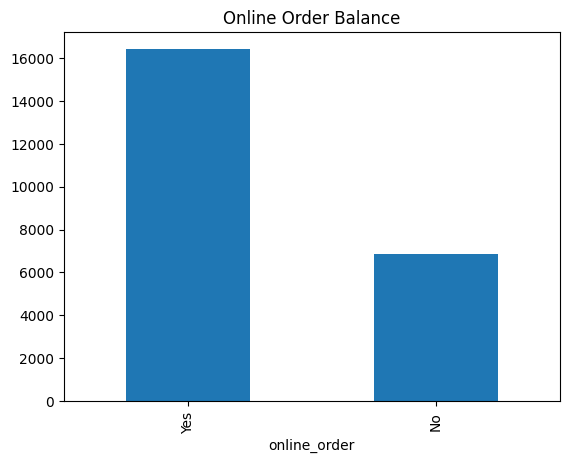

In [68]:
print(df['online_order'].value_counts())
df['online_order'].value_counts().plot(kind='bar', title='Online Order Balance')
plt.show()

online_order
Yes    16377
No     16377
Name: count, dtype: int64


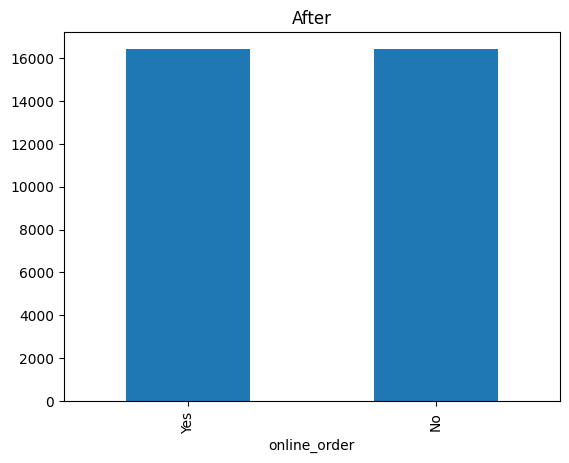

In [85]:
# By : Oversampling
from sklearn.utils import resample


df_yes = df[df['online_order'] == 'Yes']
df_no = df[df['online_order'] == 'No']
df_no_oversampled = resample(df_no, 
                           replace=True,     # العينة مع إعادة
                           n_samples=len(df_yes),  # لنفس حجم الفئة الأكبر
                           random_state=42)
df_balanced = pd.concat([df_yes, df_no_oversampled])



print(df_balanced['online_order'].value_counts())
df_balanced['online_order'].value_counts().plot(kind='bar', title='After')
plt.show()

In [88]:
# print(df.shape)
# print(df.isna().sum())
# print(df.info())
# print(df.describe(include='all'))